# Question 8: Face Detection & Body detection
### Requirement 1: Face Detection
- Detect face with and without glasses.
- Input: image => Output: faces and eyes (in image) have boundary rectangles.
- Example: Input (face_glasses_1.jpg) => Output (face_glasses_1_output.jpg)

### Requirement 2: Body detection
- Detect body .
- Input: image => Output: bodies (in image) have boundary rectangles.
- Example: Input (body.jpg) => Output (body_output.png)

# 0. Mount drive & import packages

In [9]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [10]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_FaceDetection'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_FaceDetection


In [11]:
!pip install opencv-python
!pip install mtcnn
!pip install scikit-image
!pip install opencv-contrib-python

     |████████████████████████████████| 2.3 MB 4.1 MB/s 


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import cv2
from mtcnn.mtcnn import MTCNN
from skimage import io 
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
cv2.__version__

'4.1.2'

# 1. Requirement 1: Face Detection

In [15]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
def detect(img, gray, scaleFactor1, scaleFactor2):
  faces = face_cascade.detectMultiScale(gray, scaleFactor1, 5) 
  for (x, y, w, h) in faces: # For each detected face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (24, 222, 212), 2) 
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
    eyes = eyeglass_cascade.detectMultiScale(roi_gray, scaleFactor2, 1) 
    for (ex, ey, ew, eh) in eyes: 
      cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (168, 85, 217), 2) 

  return img 

In [17]:
#load cascaade classifier training file for haarcascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyeglass_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

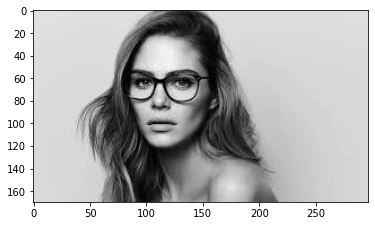

In [18]:
#load test image
img = cv2.imread('face_glasses_1.jpg')
#convert the test image to gray image as opencv face detection expects gray images
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

(-0.5, 296.5, 169.5, -0.5)

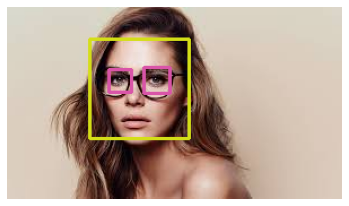

In [19]:
#convert image to RGB and show image
img = detect(img, gray_img, 1.3, 1.05)
plt.imshow(convertToRGB(img))
plt.axis('off')

In [20]:
#save output
from PIL import Image
face_out = Image.fromarray(convertToRGB(img))
face_out.save("face_glasses_1_out.jpg")

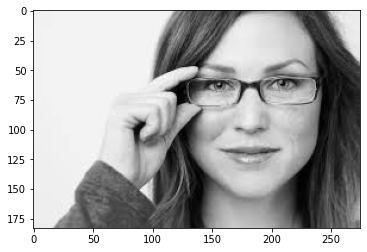

In [21]:
#load test image
img = cv2.imread('face_glasses_2.jpeg')
#convert the test image to gray image as opencv face detection expects gray images
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

(-0.5, 274.5, 182.5, -0.5)

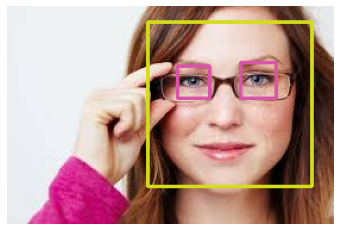

In [22]:
#convert image to RGB and show image
img = detect(img, gray_img, 1.3, 1.08)
plt.imshow(convertToRGB(img))
plt.axis('off')

In [23]:
#save output
face_out = Image.fromarray(convertToRGB(img))
face_out.save("face_glasses_2_out.jpg")

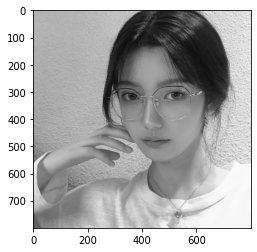

In [24]:
#load test image
img = cv2.imread('face_glasses_3.jpeg')
#convert the test image to gray image as opencv face detection expects gray images
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

(-0.5, 799.5, 799.5, -0.5)

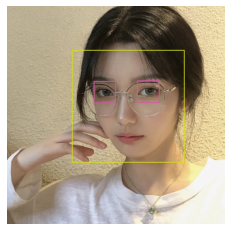

In [25]:
#convert image to RGB and show image
img = detect(img, gray_img, 1.3, 1.17)
plt.imshow(convertToRGB(img))
plt.axis('off')

In [26]:
face_out = Image.fromarray(convertToRGB(img))
face_out.save("face_glasses_3_out.jpg")

# 2. Requirement 2: Body Detection

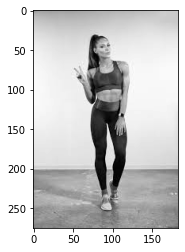

In [29]:
#load test image
img2 = cv2.imread('body.jpg')
#convert the test image to gray image as opencv face detection expects gray images
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img2, cmap='gray')
plt.show()

In [30]:
#load cascaade classifier training file for haarcascade
body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

(-0.5, 182.5, 274.5, -0.5)

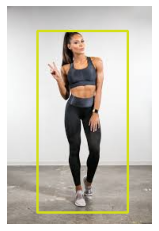

In [31]:
body = body_cascade.detectMultiScale(gray_img2, scaleFactor=1.2, minNeighbors=5)
for(x, y, w, h) in body:
    img = cv2.rectangle(img2, (x,y), (x+w,y+h), (24, 222, 212),2)
#convert image to RGB and show image
plt.imshow(convertToRGB(img2))
plt.axis('off')

In [32]:
#save output
body_out = Image.fromarray(convertToRGB(img2))
body_out.save("body_out.jpg")

# 3. Cách 2: dùng MTCNN để detect Face & Eyes

In [102]:
def detect_mtcnn(filepath):
  image = io.imread(filepath)
  detector = MTCNN()
  result = detector.detect_faces(image)
  for person in result:
    bounding_box = person['box']
    keypoints = person['keypoints']
    # tinh kich thuoc retangle mat' theo ti le voi khuon mat
    k1 = int(bounding_box[2]/5)
    k2 = int(bounding_box[3]/15)
    # ve bounding box
    # (hinh, diem dau, diem cuoi, mau sac, do day`)
    cv2.rectangle(image, #hinh
                  (bounding_box[0], bounding_box[1]), #diem dau
                  (bounding_box[0]+bounding_box[2], bounding_box[1]+bounding_box[3]), #diem cuoi
                  (78, 222, 73), 2  #mau sac, do day`
                  )
    # ve diem dai dien cho mat, mui, mieng
    # ve diem: hinh, vi tri, ban kinh, mau sac, do dam net
    cv2.rectangle(image,
                  (keypoints['left_eye'][0]-k1, keypoints['left_eye'][1]-k2),
                  (keypoints['left_eye'][0]+k1, keypoints['left_eye'][1]+k2)
                  ,(255, 0, 0),2)
    cv2.rectangle(image,
                  (keypoints['right_eye'][0]-k1, keypoints['right_eye'][1]-k2),
                  (keypoints['right_eye'][0]+k1, keypoints['right_eye'][1]+k2)
                  ,(255, 0, 0),2)
  return image

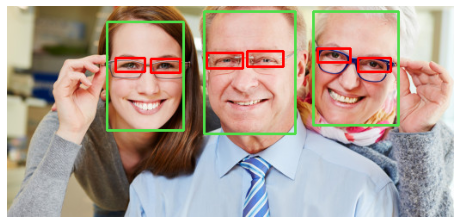

In [107]:
image1 = detect_mtcnn('face_glasses_4.jpg')
#plot the image
plt.figure(figsize=(8,6))
plt.imshow(image1)
plt.axis('off')
plt.show()

In [108]:
#save output
face_out = Image.fromarray(image1)
face_out.save("face_glasses_4_out.jpg")

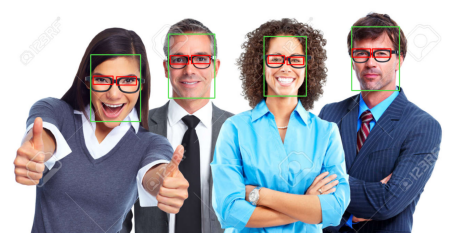

In [105]:
image2 = detect_mtcnn('face_glasses_5.jpg')
#plot the image
plt.figure(figsize=(8,6))
plt.imshow(image2)
plt.axis('off')
plt.show()

In [106]:
#save output
face_out = Image.fromarray(image2)
face_out.save("face_glasses_5_out.jpg")